In [68]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

air_quality_data_who_path = 'Resources\World_Health_Organization\Air_Quality_Data_WHO.csv'
population_Vs_Depression_path = 'Resources\Global_Burden_of_Disease\Population_Vs_Depression.csv'

air_quality_data_who = pd.read_csv(air_quality_data_who_path)
population_Vs_Depression = pd.read_csv(population_Vs_Depression_path)

merged_data = pd.merge(air_quality_data_who, population_Vs_Depression, on=["WHO Country Name","Year"], how="inner")
merged_data['Population'] = merged_data['Population'].astype(int)
merged_data['Nbr. Cases in Pop.'] = merged_data['Nbr. Cases in Pop.'].astype(int)

column_PM25 = "PM2.5 (μg/m3)"
column_PM10 = "PM10 (μg/m3)"
column_NO2 = "NO2 (μg/m3)"
column_nbrcases = "Nbr. Cases in Pop."
column_percentprev = "Percent Prevalence"

merged_data

,WHO Country Name,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),Age Group,Gender,Disorder,Population,Nbr. Cases in Pop.,Percent Prevalence
0,Australia,2012,9.650000,21.215000,7.965000,All Ages,both,Depressive disorders,22265337,1123217,5.04
1,Australia,2013,7.586000,18.536000,12.176000,All Ages,both,Depressive disorders,22607619,1132312,5.01
2,Australia,2014,8.134286,19.457143,11.102857,All Ages,both,Depressive disorders,22944404,1141102,4.97
3,Australia,2015,6.723636,17.385455,9.123636,All Ages,both,Depressive disorders,23279414,1149604,4.94
4,Australia,2016,7.078182,17.160909,10.382727,All Ages,both,Depressive disorders,23615057,1136581,4.81
5,Australia,2017,7.280000,17.873333,7.900000,All Ages,both,Depressive disorders,23943549,1126306,4.70
6,Australia,2018,8.060000,18.953333,6.936667,All Ages,both,Depressive disorders,24260443,1140466,4.70
7,Australia,2019,9.102105,21.527368,10.087368,All Ages,both,Depressive disorders,24568113,1160299,4.72
8,Bosnia and Herzegovina,2016,32.965000,43.490000,13.410000,All Ages,both,Depressive disorders,3446975,117896,3.42
9,Bosnia and Herzegovina,2017,32.560000,40.450000,11.220000,All Ages,both,Depressive disorders,3396773,116949,3.44


In [69]:
#Checking for missing values
print(merged_data.isnull().sum())

WHO Country Name      0
Year                  0
PM2.5 (μg/m3)         0
PM10 (μg/m3)          0
NO2 (μg/m3)           0
Age Group             0
Gender                0
Disorder              0
Population            0
Nbr. Cases in Pop.    0
Percent Prevalence    0
dtype: int64


In [70]:
#Counting the number of unique regions, countries and cities

num_countries= merged_data["WHO Country Name"].nunique()
print("Number of WHO Countries: ", num_countries)
num_years = merged_data["Year"].nunique()
print("Number of Years: ", num_years)


Number of WHO Countries:  10
Number of Years:  10


In [71]:
pm25_mean = merged_data[column_PM25].mean()
pm25_median = merged_data[column_PM25].median()
pm25_mode = merged_data[column_PM25].value_counts().idxmax()
pm25_skewness = merged_data[column_PM25].skew()
pm25_min = merged_data[column_PM25].min()  
pm25_max = merged_data[column_PM25].max()  

pm10_mean = merged_data[column_PM10].mean()
pm10_median = merged_data[column_PM10].median()
pm10_mode = merged_data[column_PM10].value_counts().idxmax()
pm10_skewness = merged_data[column_PM10].skew()
pm10_min = merged_data[column_PM10].min()  
pm10_max = merged_data[column_PM10].max()

no2_mean = merged_data[column_NO2].mean()
no2_median = merged_data[column_NO2].median()
no2_mode = merged_data[column_NO2].value_counts().idxmax()
no2_skewness = merged_data[column_NO2].skew()
no2_min = merged_data[column_NO2].min()
no2_max = merged_data[column_NO2].max()

nbrcases_mean = merged_data[column_nbrcases].mean()
nbrcases_median = merged_data[column_nbrcases].median()
nbrcases_mode = merged_data[column_nbrcases].value_counts().idxmax()
nbrcases_skewness = merged_data[column_nbrcases].skew()
nbrcases_min = merged_data[column_nbrcases].min()  
nbrcases_max = merged_data[column_nbrcases].max()  

percentcases_mean = merged_data[column_percentprev].mean()
percentcases_median = merged_data[column_percentprev].median()
percentcases_mode = merged_data[column_percentprev].value_counts().idxmax()
percentcases_skewness = merged_data[column_percentprev].skew()
percentcases_min = merged_data[column_percentprev].min()
percentcases_max = merged_data[column_percentprev].max()

summary_dict = {
    "PM2.5": {
        "Mean": pm25_mean,
        "Median": pm25_median,
        "Mode": pm25_mode,
        "Min": pm25_min,
        "Max": pm25_max,
        "Skewness": pm25_skewness
        
    },
    "PM10": {
        "Mean": pm10_mean,
        "Median": pm10_median,
        "Mode": pm10_mode,
        "Min": pm10_min,
        "Max": pm10_max,
        "Skewness": pm10_skewness
        
    },
    "NO2": {
        "Mean": no2_mean,
        "Median": no2_median,
        "Mode": no2_mode,
        "Min": no2_min,
        "Max": no2_max,
        "Skewness": no2_skewness       
    },
    
    "Number Cases": {
        "Mean": nbrcases_mean,
        "Median": nbrcases_median,
        "Mode": nbrcases_mode,
        "Min": nbrcases_min,
        "Max": nbrcases_max,
        "Skewness": nbrcases_skewness
        
    },
    "Percent Cases": {
        "Mean": percentcases_mean,
        "Median": percentcases_median,
        "Mode": percentcases_mode,
        "Min": percentcases_min,
        "Max": percentcases_max,
        "Skewness": percentcases_skewness
        
    }
}

summary_df = pd.DataFrame(summary_dict)
summary_df.round(2)

,PM2.5,PM10,NO2,Number Cases,Percent Cases
Mean,13.38,23.86,19.00,3159764.24,3.98
Median,10.01,23.33,17.83,899968.50,3.81
Mode,9.65,16.78,7.96,1123217.00,4.66
Min,5.35,11.81,6.80,116460.00,2.52
Max,32.97,46.65,39.37,15290457.00,5.04
Skewness,1.23,0.91,0.67,1.76,-0.34


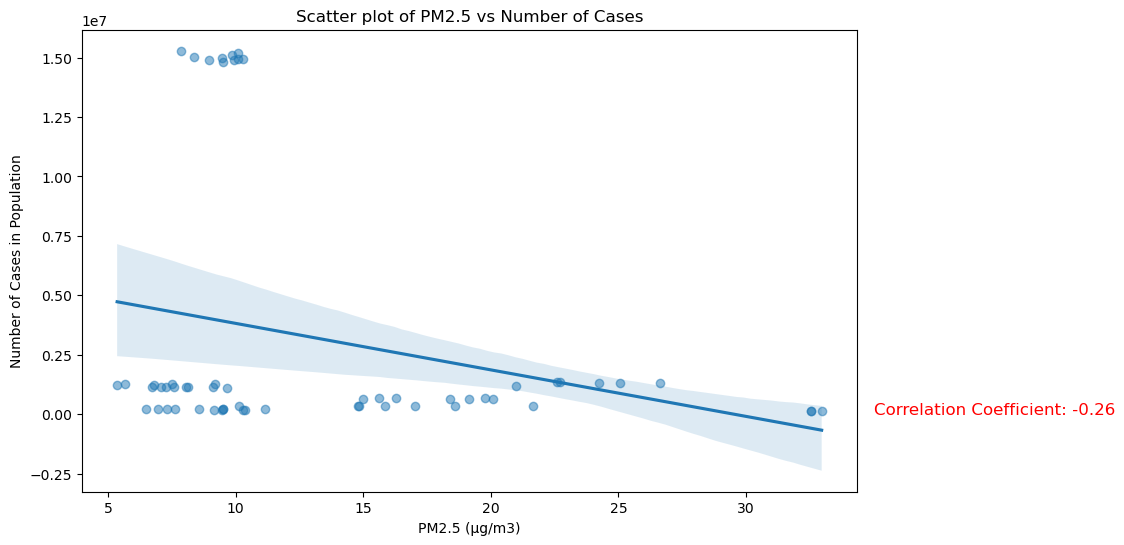

In [72]:
import seaborn as sns
import scipy.stats as stats

# Calculate correlation coefficient
correlation_coefficient = merged_data[[column_PM25, column_nbrcases]].corr().iloc[0, 1]

# Plot scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=column_PM25, y=column_nbrcases, data=merged_data, scatter_kws={'alpha':0.5})
plt.title('Scatter plot of PM2.5 vs Number of Cases')
plt.xlabel('PM2.5 (μg/m3)')
plt.ylabel('Number of Cases in Population')

# Add correlation coefficient to the plot
plt.text(35, 900, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='red')

plt.show()
